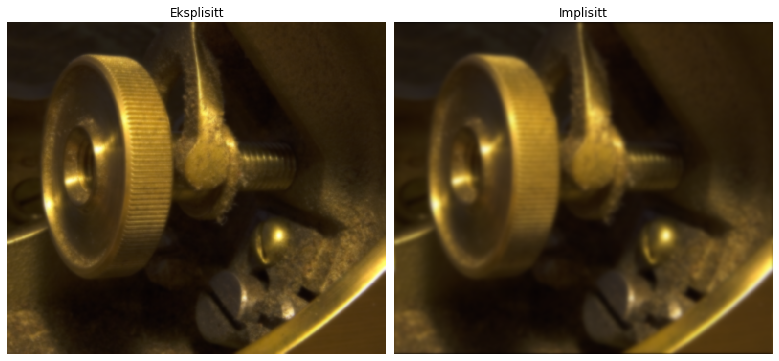

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from Source.implisitt import implisitt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import Source.ImageView as im
import Source.Eksplisitt as eks


file= '../hdr-bilder/Adjuster/Adjuster_00008.png'
u=imageio.imread(file)
#u = np.sum(u.astype(float),2) /(3*255)   # konverter til gråtone
u = u.astype(float) / 255
u[u<0]=0
u[u>1]=1
copy=np.copy(u)
eksIm=eks.eksplisittGlatting(u,copy, 3)
impIm = implisitt(u,n=5, alpha=1,rgb=True)

plt.figure(figsize=(16, 8))         # Setter størrelse på bildene
plt.subplot(131)                    # Legger til subplot for bilde
plt.imshow(eksIm)   # Viser bildet
plt.title('Eksplisitt')          # Legger til tittel
plt.axis('off')                     # Fjerner aksene i figuren
    
plt.subplot(132)                    # Legger til subplot for bilde
plt.imshow(impIm)        # Viser glattet bilde        
plt.title("Implisitt")                     # Legger til tittel
plt.axis('off')                     # Fjerner aksene i figuren
                                    # Gjør margene mindre
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,right=1)
plt.show()